In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from IPython.display import display, clear_output 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import time
%matplotlib inline

In [2]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("SampleSubmission.csv")
ID = pd.read_csv("IdLookupTable.csv")

In [3]:
print(train.head())

   left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1       

In [22]:
train_data = train['Image']
print(len(train_data))
# print(train_data[0])
train_data_samp = np.asarray([int(n) for n in train_data[0].split()])
print(train_data_samp)
test_data = test['Image']
print(len(train_data_samp))
print(len(train_data_samp) / 96)

7049
[238 236 237 ...,  70  75  90]
9216
96.0


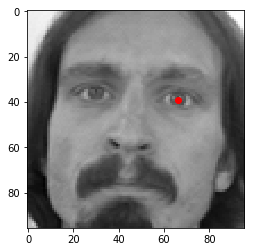

In [7]:
## rescale training data to 0,1 scale
train_data_samp = train_data_samp / 255.0

plt.figure(figsize=(4,4))
p = plt.subplot(1, 1, 1)

img = train_data_samp.reshape(96,96)
p.imshow(img, cmap='gray')
p.scatter(train['left_eye_center_x'][0], train['left_eye_center_y'][0], c='red', marker='o')
# p.annotate('left eye center', xy=(train['left_eye_center_x'][0], train['left_eye_center_y'][0]), 
#           xytext=(train['left_eye_center_x'][0] + 1, train['left_eye_center_y'][0] + 1),
#            arrowprops=dict(facecolor='red', shrink=0.05),          )

In [8]:
print(sample.head())

   RowId  Location
0      1         0
1      2         0
2      3         0
3      4         0
4      5         0


In [8]:
print(ID)

       RowId  ImageId                FeatureName  Location
0          1        1          left_eye_center_x       NaN
1          2        1          left_eye_center_y       NaN
2          3        1         right_eye_center_x       NaN
3          4        1         right_eye_center_y       NaN
4          5        1    left_eye_inner_corner_x       NaN
5          6        1    left_eye_inner_corner_y       NaN
6          7        1    left_eye_outer_corner_x       NaN
7          8        1    left_eye_outer_corner_y       NaN
8          9        1   right_eye_inner_corner_x       NaN
9         10        1   right_eye_inner_corner_y       NaN
10        11        1   right_eye_outer_corner_x       NaN
11        12        1   right_eye_outer_corner_y       NaN
12        13        1   left_eyebrow_inner_end_x       NaN
13        14        1   left_eyebrow_inner_end_y       NaN
14        15        1   left_eyebrow_outer_end_x       NaN
15        16        1   left_eyebrow_outer_end_y       N

In [42]:
# initiate lists for submission file
list_row_IDs = []
list_location = []
# create an average value for the initial guess of the location of each facial feature
average_guess = (len(train_data_samp) / 96)/2
# store row ID and average guess to each
for i in range(len(ID)):
    list_row_IDs.append(ID['RowId'][i])
    list_location.append(average_guess)

# create a pandas dataframe for the initial file submission
data = {'RowId': list_row_IDs, 'Location': list_location}
initial_submission = pd.DataFrame(data = data, columns = ['RowId', 'Location'])

initial_submission.to_csv('initial_submission.csv', index=False)